In [13]:
!pip install tensorflow

In [14]:
!pip install transformers

In [15]:
!pip install keras

Record:  Humanity's growing footprint hasn't been kind to the planet - or our own future. Can intelligent #DigitalPower reshape our relationship with #energy & lead us into a green & abundant #IntelligentWorld2030? Learn more. https://tinyurl.com/y4tf4t72 #HuaweiBlog
Label:  2021-12-23T10:29:22+0000
Epoch 1/13
1044/1044 [==============================] - 25s 23ms/step - loss: 988.6243 - accuracy: 0.0514 - val_loss: 486.7235 - val_accuracy: 0.2130
Epoch 2/13
1044/1044 [==============================] - 22s 22ms/step - loss: 619.9103 - accuracy: 0.1456 - val_loss: 325.5045 - val_accuracy: 0.2426
Epoch 3/13
1044/1044 [==============================] - 27s 26ms/step - loss: 441.9576 - accuracy: 0.1645 - val_loss: 245.2710 - val_accuracy: 0.2974
Epoch 4/13
1044/1044 [==============================] - 24s 23ms/step - loss: 333.2384 - accuracy: 0.1797 - val_loss: 202.6816 - val_accuracy: 0.3587
Epoch 5/13
1044/1044 [==============================] - 21s 20ms/step - loss: 256.4023 - accuracy: 

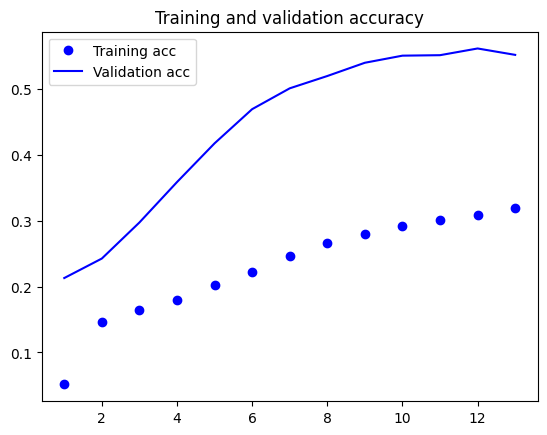

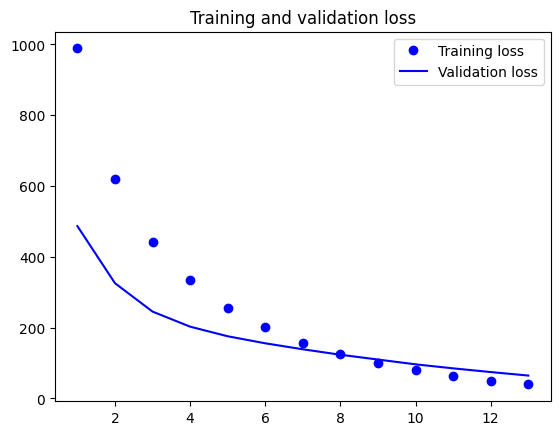

261/261 [==============================] - 2s 8ms/step - loss: 64.5537 - accuracy: 0.5519
Test loss: 64.55365753173828
Test accuracy: 0.5518811345100403


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/Huwavie data 2021_2022.xlsx')
x = df.iloc[:, 1].values
y = df.iloc[:, 0].values

print("Record: ", x[23])
print("Label: ", y[23])

# Convert each element in x to string
x = [str(text) for text in x]

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
encoded_inputs = tokenizer(x, padding=True, truncation=True, max_length=20, return_tensors='tf')

# Convert the labels to categorical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y = to_categorical(y, num_classes)

# Convert TensorFlow tensor to NumPy array
X = encoded_inputs['input_ids'].numpy()

# Reshape X to match the expected shape
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=13, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
